In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [20]:
# data collection and processing 
#loading the data on a Pandas Dataframe
gold_data=pd.read_csv(r"D:Users\User\Downloads\gld_price.csv")

In [21]:
# print first 5 rows of the Dataframe 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
#print last 5 rows 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [23]:
gold_data.shape

(2290, 6)

In [24]:
#getting some basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [25]:
# CHECKING THE NO.OF MISSING VALUES 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [26]:
# getting statistical measures of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [27]:
# positive correlation and # negative correlation 
correlation = gold_data.corr()

ValueError: dictionary update sequence element #0 has length 6; 2 is required

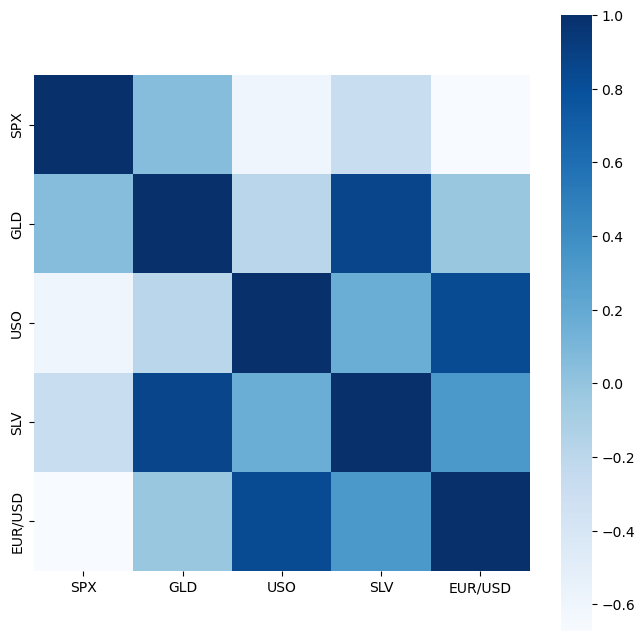

In [29]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True , fmt = '.1f' , annot = True , annot_kws={'size:8'},cmap='Blues')

In [30]:
#correlation values of GLD 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\User\OneDrive\Documents\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

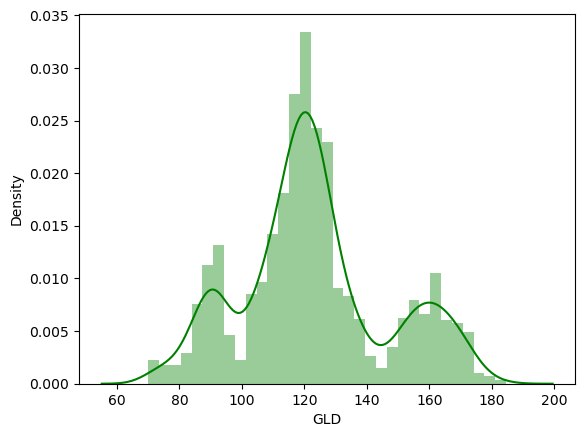

In [31]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color = 'green')

In [32]:
# splitting the features and Target 
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [34]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [35]:
#Splitting into Training and Testing Data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 2)

In [36]:
# Model Training 
# Random Forest Regressor 
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
#training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
#Model evaluation # prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [39]:
print(test_data_prediction)

[168.74759981  82.0971998  115.78840028 127.5657007  120.5869015
 154.69719661 150.39659872 126.12050032 117.54509868 125.93530097
 116.46960127 171.73950071 142.10179874 167.78019874 115.09970022
 117.70480021 137.8611032  170.25800087 159.54180276 157.57729936
 155.23390024 125.48330026 176.09750027 156.90940369 125.25230036
  93.70539979  77.67730017 120.77280017 119.11559946 167.61779935
  88.07860095 125.08089958  91.03430092 117.76539993 121.02279934
 136.95070072 115.26230147 115.08350102 147.29899966 107.18740121
 103.54700235  87.15859775 126.4968006  117.84660011 153.94499907
 119.58950045 108.37349974 107.93849861  93.35590061 127.12929751
  75.41500023 113.62859938 121.25269971 111.20819928 118.9585991
 120.80299947 159.73800042 169.04410066 146.84659698  85.98639871
  94.19140038  86.95779897  90.66310044 119.0436009  126.48640016
 127.79060017 168.86510006 122.26809935 117.53899877  98.54680015
 167.97050098 143.10219796 131.91930257 121.2707022  120.67969915
 119.7134005

In [40]:
# R square error 
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(" R squared error : ",error_score)

 R squared error :  0.9893324775208636


In [41]:
#Compare the actual and predicted values in a plot 
Y_test = list(Y_test)


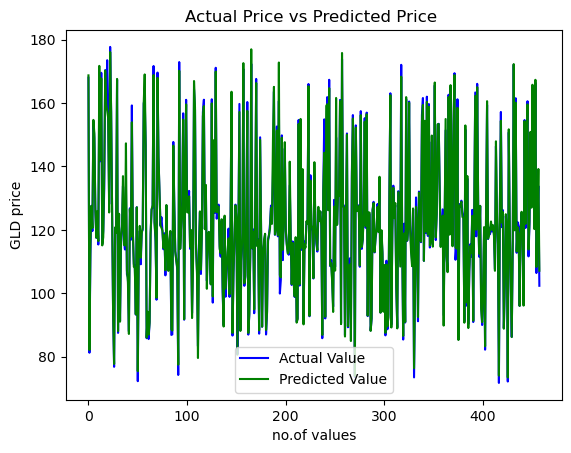

In [42]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price ')
plt.xlabel('no.of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()